# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [19]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [20]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [21]:
# Import adultData.csv 
df = pd.read_csv('data/adultData.csv')

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [22]:
print(df.head())
print('-----------------------------------------------------------------')
print(df.tail())

    age         workclass  fnlwgt  education  education-num  \
0  39.0         State-gov   77516  Bachelors             13   
1  50.0  Self-emp-not-inc   83311  Bachelors             13   
2  38.0           Private  215646    HS-grad              9   
3  53.0           Private  234721       11th              7   
4  28.0           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race  sex_selfID  \
0       Never-married       Adm-clerical  Not-in-family  White  Non-Female   
1  Married-civ-spouse    Exec-managerial        Husband  White  Non-Female   
2            Divorced  Handlers-cleaners  Not-in-family  White  Non-Female   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black  Non-Female   
4  Married-civ-spouse     Prof-specialty           Wife  Black      Female   

   capital-gain  capital-loss  hours-per-week native-country income_binary  
0          2174             0            40.0  United-States         <=50K 

In [23]:
# Find the total amount of null values in data set
print(df.isnull().sum())

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64


In [24]:
# Find mean values to replace missing values
mean_val_hrsweek = df['hours-per-week'].mean()
mean_val_age = df['age'].mean()

In [25]:
# Replace missing values with column mean
df['hours-per-week'] = df['hours-per-week'].fillna(mean_val_hrsweek)
df['age'] = df['age'].fillna(mean_val_age)

In [26]:
# Inspect data types
print(df.dtypes)

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [27]:
# One-hot encoding in order to create binary label
df = pd.get_dummies(df, columns=['income_binary'])

In [28]:
# Exclude unnecessary data type values - feature selection
exclude = df.select_dtypes('object').columns.tolist()
exclude.append('income_binary_<=50K')
exclude.append('income_binary_>50K')
exclude.append('fnlwgt')
exclude

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex_selfID',
 'native-country',
 'income_binary_<=50K',
 'income_binary_>50K',
 'fnlwgt']

In [29]:
# set correct columns to label and features variable
features = df.drop(columns = exclude)
label = df['income_binary_>50K']

In [30]:
features

,age,education-num,capital-gain,capital-loss,hours-per-week
0,39.0,13,2174,0,40.0
1,50.0,13,0,0,13.0
2,38.0,9,0,0,40.0
3,53.0,7,0,0,40.0
4,28.0,13,0,0,40.0
...,...,...,...,...,...
32556,27.0,12,0,0,38.0
32557,40.0,9,0,0,40.0
32558,58.0,9,0,0,40.0
32559,22.0,9,0,0,20.0


In [31]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_binary_<=50K,income_binary_>50K
age,1.000000,-0.076085,0.036685,0.124705,0.057478,0.066572,-0.233097,0.233097
fnlwgt,-0.076085,1.000000,-0.043195,-0.002234,-0.010252,-0.018047,0.009463,-0.009463
education-num,0.036685,-0.043195,1.000000,0.167089,0.079923,0.146553,-0.335154,0.335154
capital-gain,0.124705,-0.002234,0.167089,1.000000,-0.055138,0.100995,-0.347555,0.347555
capital-loss,0.057478,-0.010252,0.079923,-0.055138,1.000000,0.054202,-0.150526,0.150526
hours-per-week,0.066572,-0.018047,0.146553,0.100995,0.054202,1.000000,-0.228397,0.228397
income_binary_<=50K,-0.233097,0.009463,-0.335154,-0.347555,-0.150526,-0.228397,1.000000,-1.000000
income_binary_>50K,0.233097,-0.009463,0.335154,0.347555,0.150526,0.228397,-1.000000,1.000000


In [32]:
df_corr_plot = df[['income_binary_>50K','age','education-num','capital-gain','capital-loss','hours-per-week']]
df_corr_plot

,income_binary_>50K,age,education-num,capital-gain,capital-loss,hours-per-week
0,0,39.0,13,2174,0,40.0
1,0,50.0,13,0,0,13.0
2,0,38.0,9,0,0,40.0
3,0,53.0,7,0,0,40.0
4,0,28.0,13,0,0,40.0
...,...,...,...,...,...,...
32556,0,27.0,12,0,0,38.0
32557,1,40.0,9,0,0,40.0
32558,0,58.0,9,0,0,40.0
32559,0,22.0,9,0,0,20.0


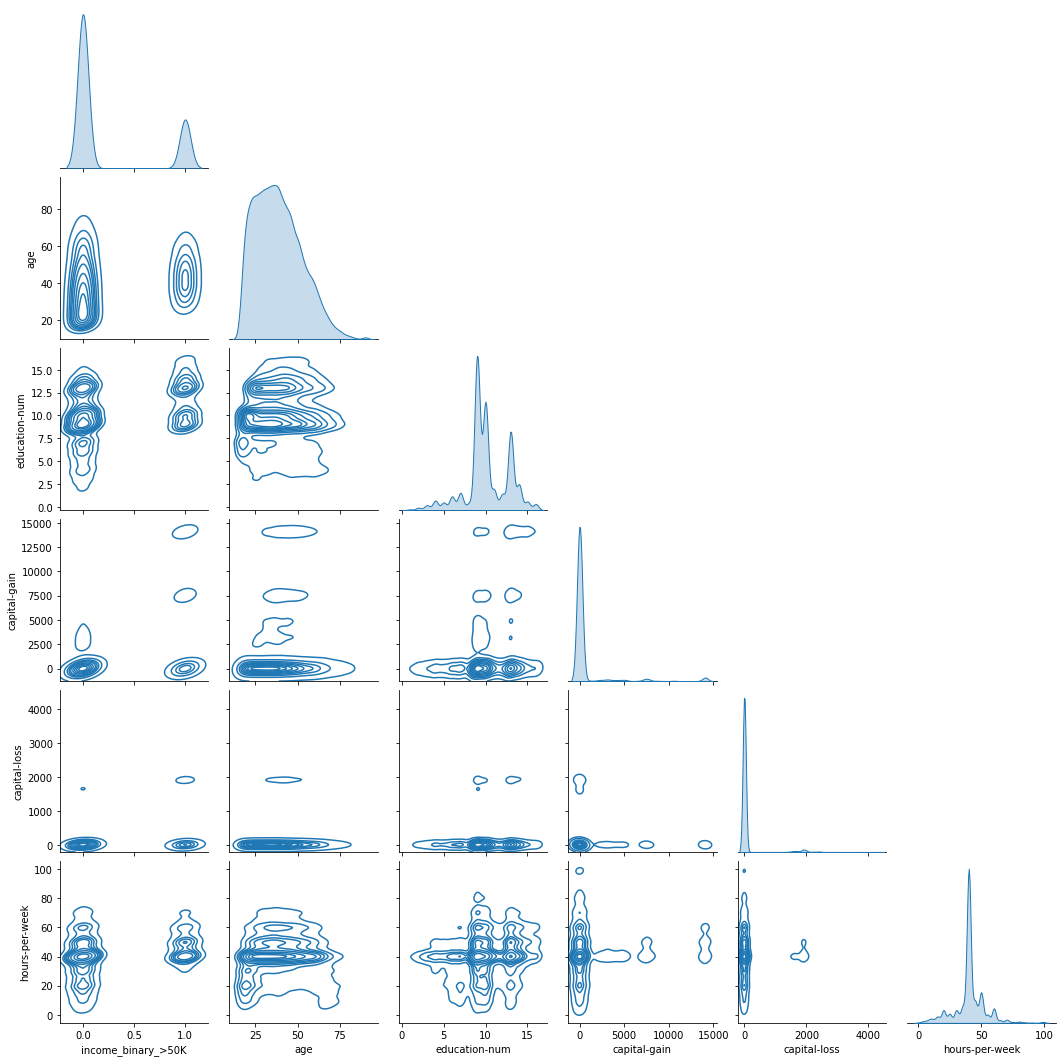

In [33]:
# Plot label/feature correlation using pairplot (Correlation Visualization #1)
sns.pairplot(data=df_corr_plot, kind = 'kde', corner = True)

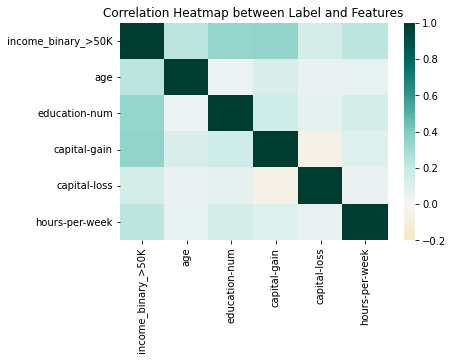

In [59]:
# Plot label/feature correlation using heat map (Correlation Visualization #2)
corr_matrix = df_corr_plot.corr()
sns.heatmap(corr_matrix, cmap='BrBG', center=0, vmin=-.2)
plt.title('Correlation Heatmap between Label and Features')
plt.show()

In [61]:
# Set training and testing data
X = features
y = label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(22792, 5)
(9769, 5)
(9769,)
(22792,)


In [63]:
# Declare LogisticRegression() to model variable to call upon later
model = LogisticRegression()
# Fit the training data
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
# Find accuracy score, log loss, and predication probabilities
probability_predictions = model.predict_proba(X_test)

df_print = pd.DataFrame(probability_predictions, columns = ['Class: False', 'Class: True'])
print('Class Prediction Probabilities: \n' + df_print[0:5].to_string(index=False))

l_loss = log_loss(y_test, probability_predictions)
print('Log loss: ' + str(l_loss))

class_labels = model.predict(X_test)

print('class labels: ' + str(class_labels[0:5]))

acc_score = accuracy_score(y_test, class_labels)
print('Accuracy Score: ' + str(acc_score))
print(f'Accuracy Percentage: {acc_score*100:.2f}%')

Class Prediction Probabilities: 
 Class: False  Class: True
     0.751098     0.248902
     0.789699     0.210301
     0.907038     0.092962
     0.059903     0.940097
     0.894446     0.105554
Log loss: 0.4073487265413498
class labels: [0 0 0 1 0]
Accuracy Score: 0.8147200327566793
Accuracy Percentage: 81.47%
